# Patryk Barkowski - projekt
---
### Analiza Danych Elektrofizjologicznych 2017
---
Witam w moim królestwie.<br>Postaram się możliwie uprzyjemnić podróż przez niniejszą pracę - będzie ładnie, wizualnie i - **mam nadzieję!** - przejrzyście. Ponizej spis treści, gdybyśmy się mieli pogubić:
0. przygotowanie do pracy
1. asd
2. awq
3. wrg

ZROBIĆ<br>
Tak jak omawialiśmy na zajęciach - projekt to notebook, w którym przygotowujecie plik do analizy, tzn: POPRAWIC NA 1 OSOBĘ!

* wczytajecie, dodajecie pozycję kanałów, filtrujecie
* epokujecie względem interesujących wydarzeń
* dopasowujecie ICA i oznaczacie komponenty wyjaśniające artefakty w sygnale, czyścicie z nich sygnał
* przeprowadzanie proste porównanie dwóch warunków pod kątem ERP
* przeprowadzacie proste porównanie dwóch warunków pod kątem widma

## 0. przygotowanie do pracy

Na dzień dobry klasyczne i zawsze oczekiwane - powitajmy **os** oraz **mne**!

In [1]:
import os
import mne

Upewaniam się czy plik (wybrałem **CAT110 20131108 2040002.raw**) jest obecny w folderze:

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 045A-06F7

 Directory of C:\Users\Machina\Desktop\analizadanycheeg\projekt

03.07.2017  07:35    <DIR>          .
03.07.2017  07:35    <DIR>          ..
01.07.2017  18:54    <DIR>          .ipynb_checkpoints
01.07.2017  19:11         1˙125˙157 12.ipynb
23.05.2017  21:53        51˙829˙776 CAT110 20131108 2040002.raw
03.07.2017  07:35         3˙662˙017 proj 2017 patryk barkowski.ipynb
               3 File(s)     56˙616˙950 bytes
               3 Dir(s)  10˙288˙717˙824 bytes free


Na koniec żeby nie męczyć się za mocno z kopiowaniem nazwy, zrobię zmienną z nazwą pliku:

In [3]:
plik = "CAT110 20131108 2040002.raw"

## 1. wczytywanie pliku


Klasyczna komenta dla wczytaniu pliku z rozszerzeniem .raw:

In [4]:
dane = mne.io.read_raw_egi(plik, preload=True)

Reading EGI header from CAT110 20131108 2040002.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
    Found multiple events at the same time sample. Cannot create trigger channel.
Reading 0 ... 177498  =      0.000 ...   709.992 secs...


Sprawdzmy szybko ile kanałów ma nasz sygnał:

In [5]:
dane

<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 73 x 177499 (710.0 sec), ~99.0 MB, data loaded>

73 kanały, nieźle!

In [6]:
%matplotlib inline

In [13]:
%matplotlib


Using matplotlib backend: Qt5Agg


## 2. filtrowanie


Zastosuję następujące filtry: górno-przepustowy 1Hz oraz low transition bandwith 0,25Hz.

Dodatkowo, zgodnie z wskazówkami z zajęć, kopiuję dane tak, aby nie ingerować w oryginalny surowy sygnał.

In [7]:
dane2 = dane.copy()
dane2.filter(1, None, l_trans_bandwidth=0.25)

Setting up high-pass filter at 1 Hz
Filter length of 6600 samples (26.400 sec) selected


<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 73 x 177499 (710.0 sec), ~99.0 MB, data loaded>

Porównam sobie sygnał sprzed filtrowania...

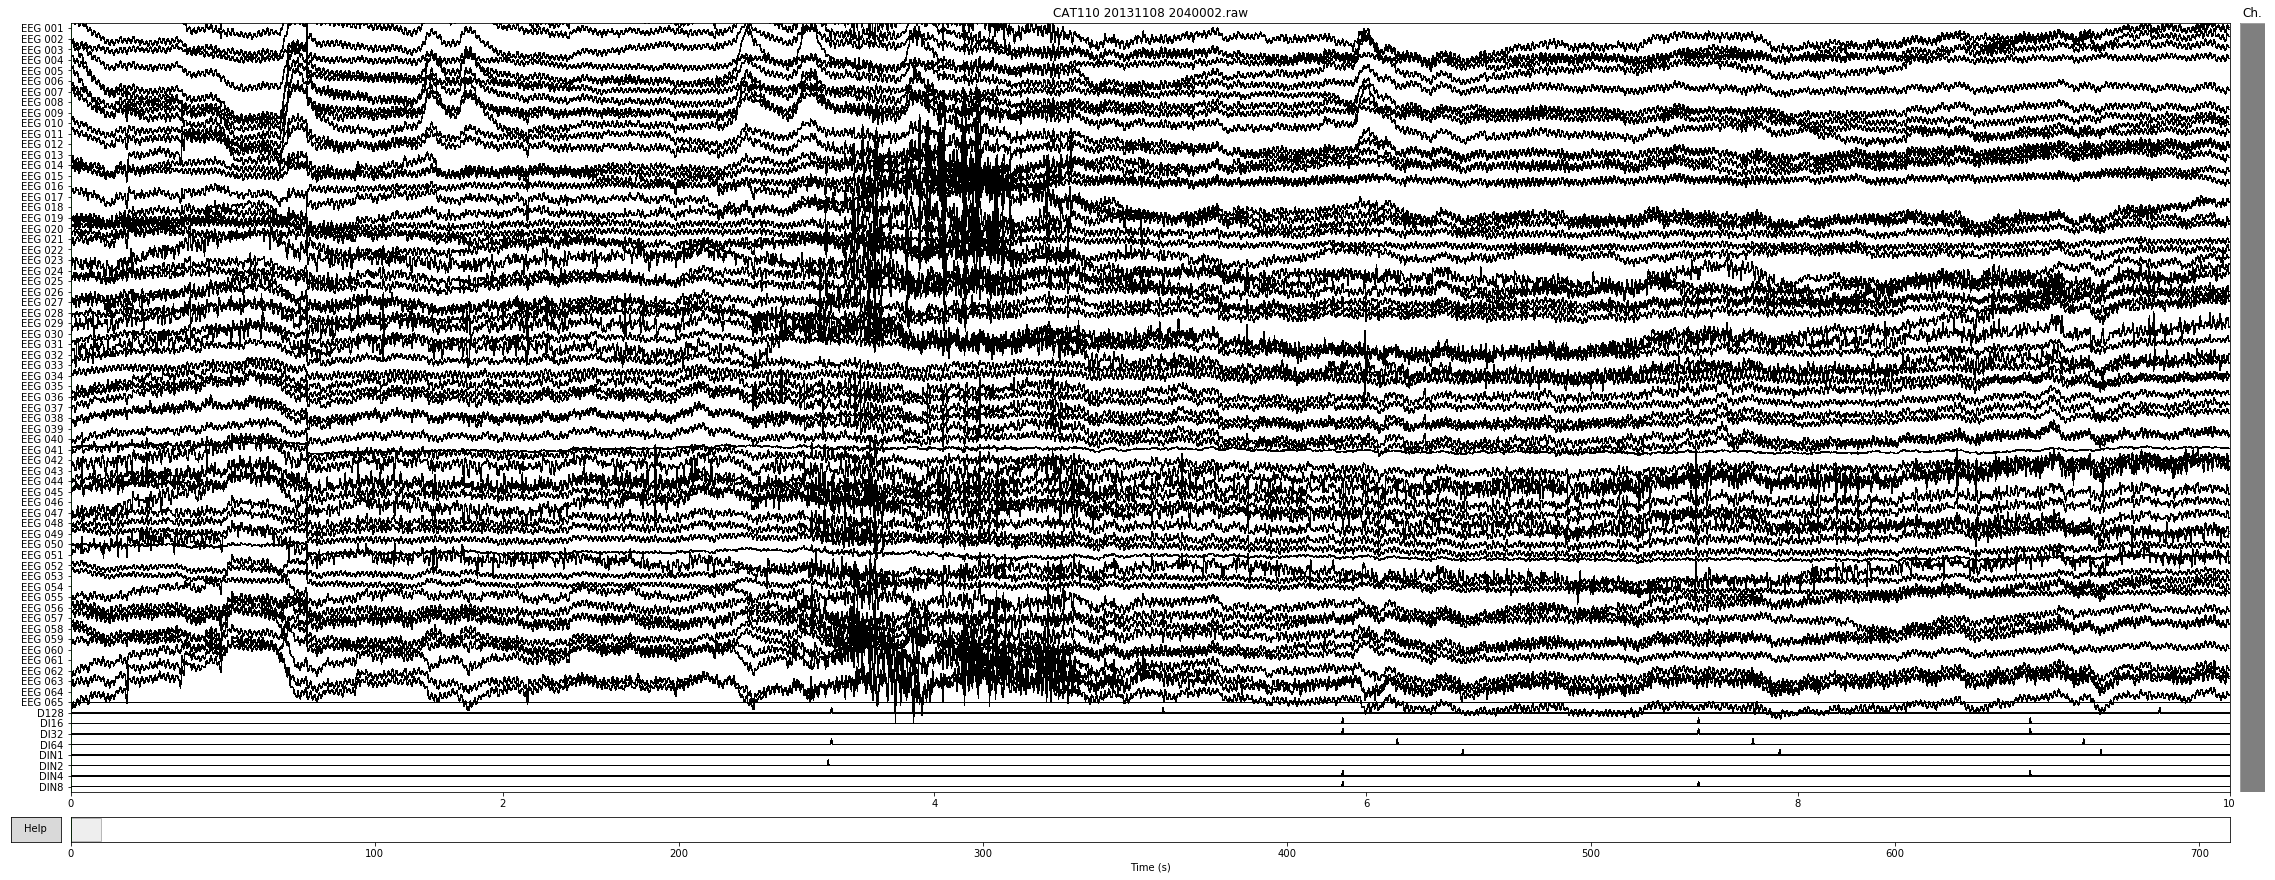

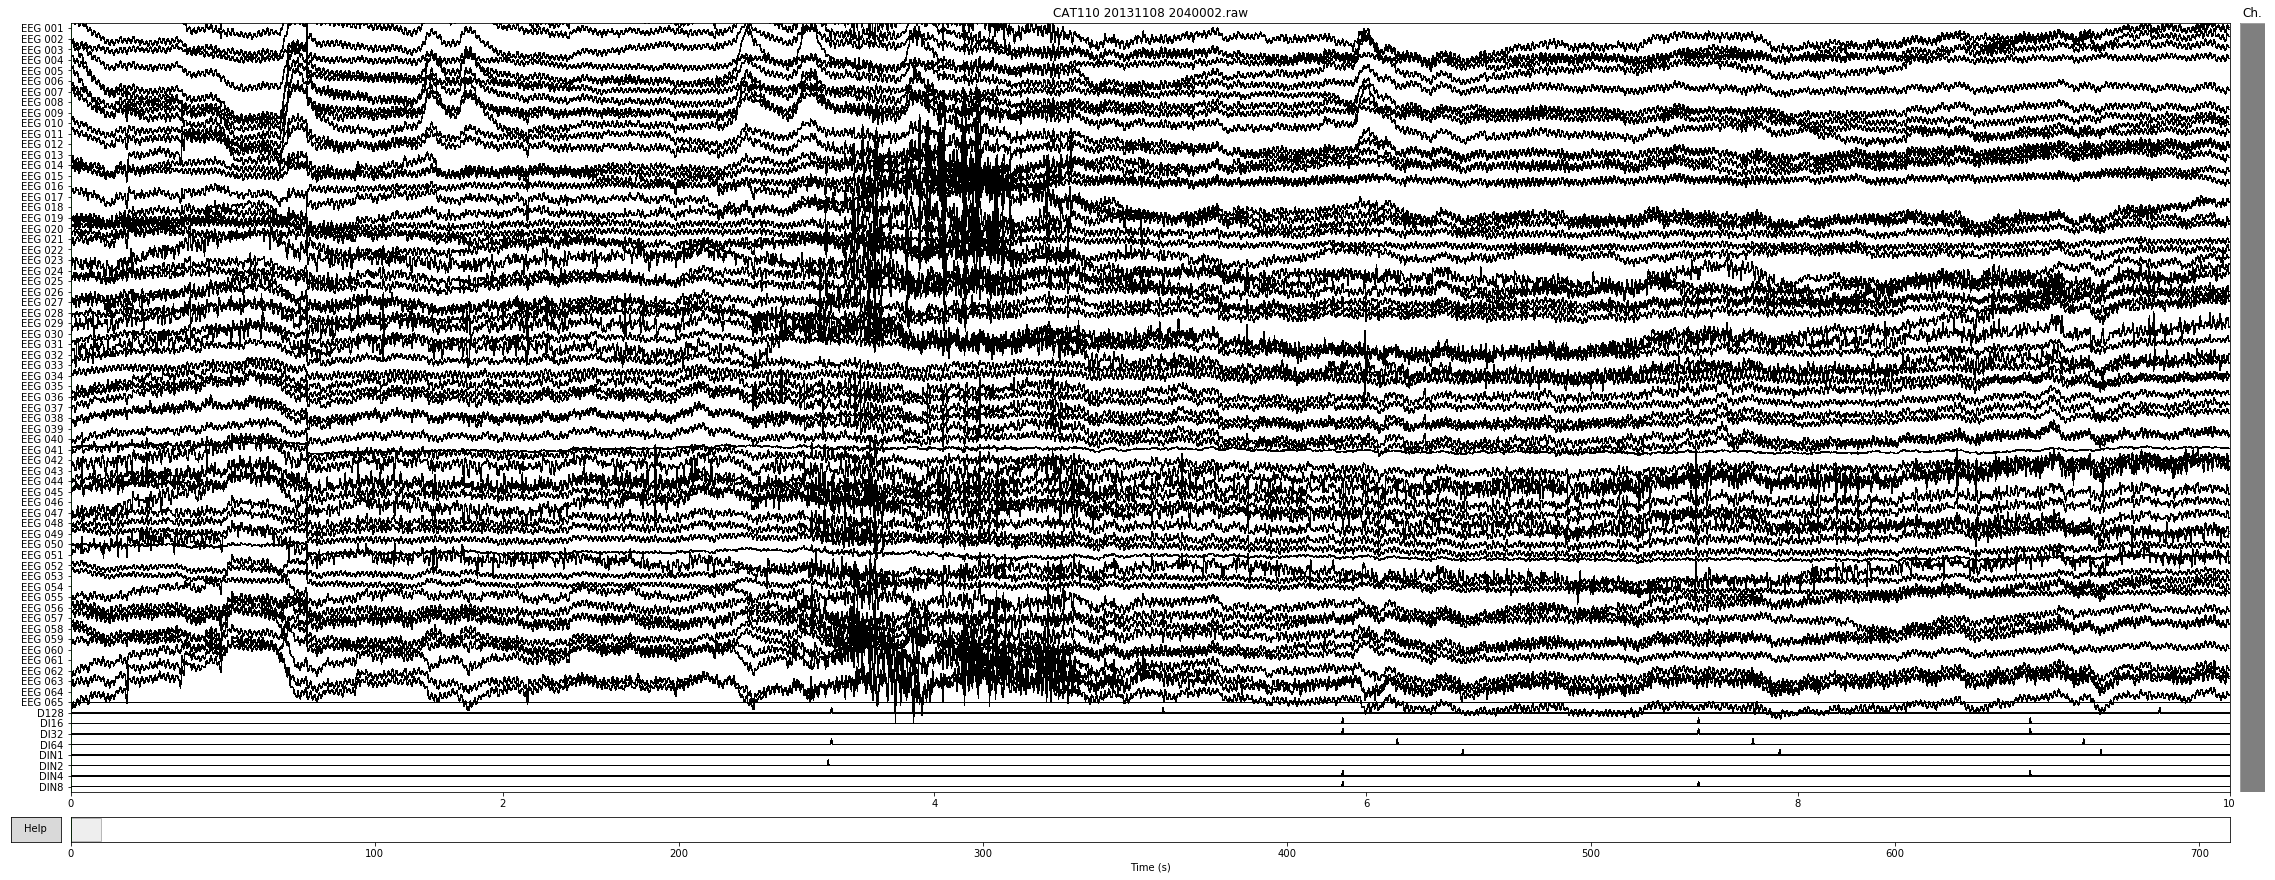

In [8]:
dane.plot(start=0, n_channels=73)

... oraz efekt po filtowaniu, upewniam się, że sygnał zauważanie mniej "pływa":

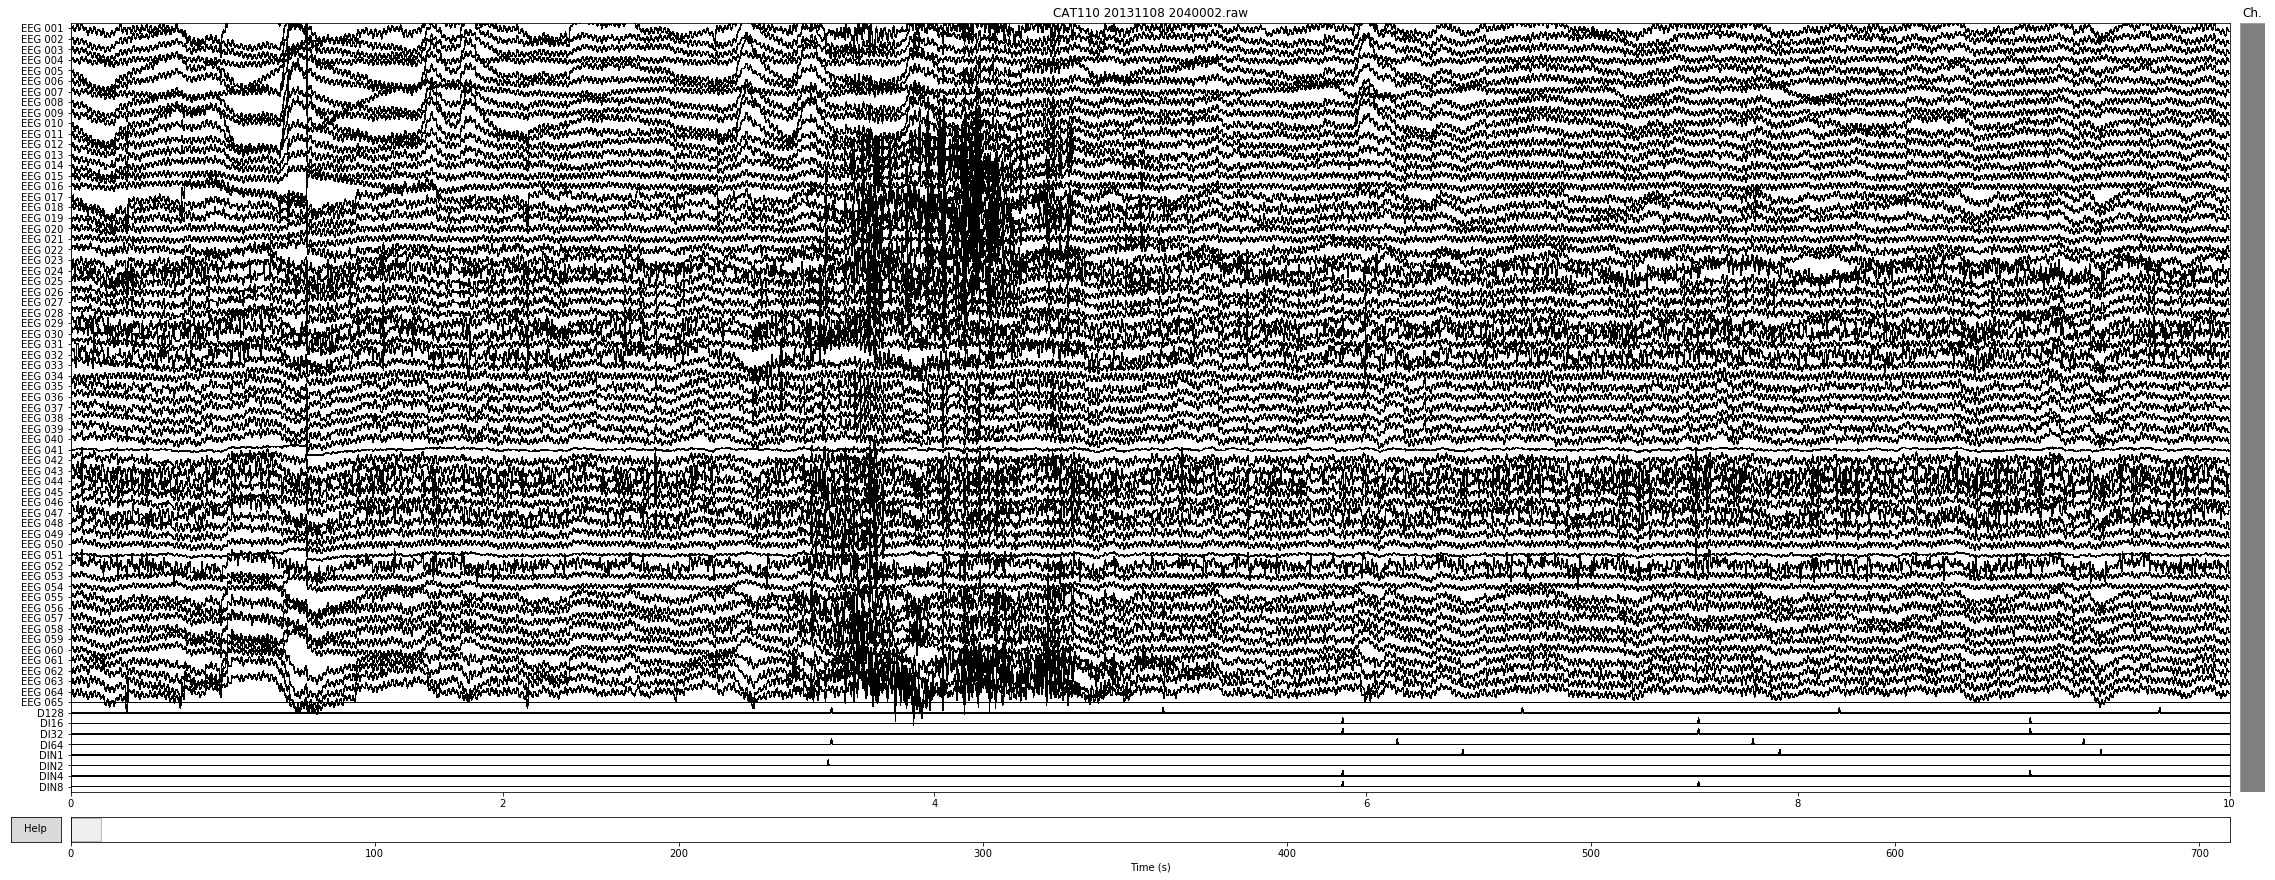

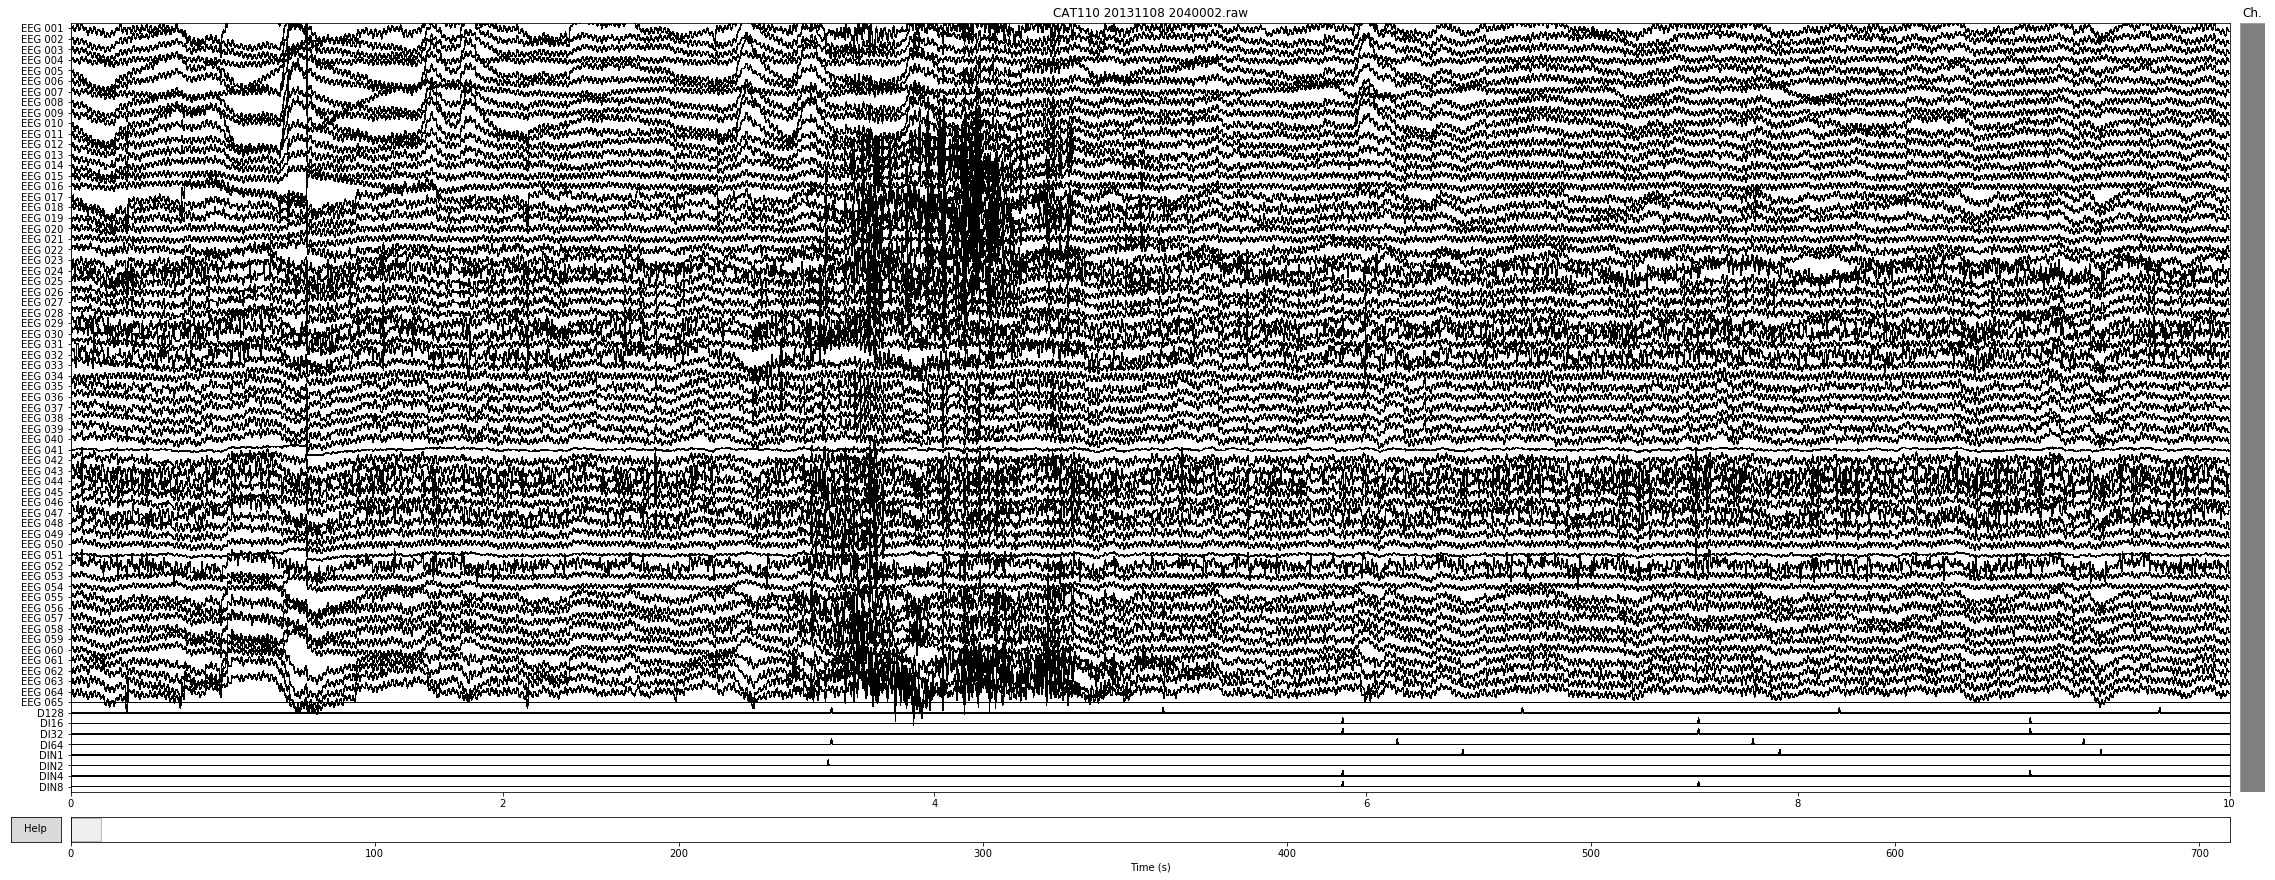

In [9]:
dane2.plot(start=0, n_channels=73)

## 3. pozycje elektrod


Ponieważ kanały nazywające się np. EEG033 nie dają nam jakiejkolwiek informacji, muszę wczytać odpowiedni montaż. Zgodnie z instrukcją, będzie to **GSN-HydroCel-65_1.0**. Nie będę tworzył zmiennych jak na zajęciach, ponieważ później nie przydadzą mi się w projekcie.

In [8]:
mne.channels.read_montage('GSN-HydroCel-65_1.0')

<Montage | GSN-HydroCel-65_1.0 - 68 channels: FidNz, FidT9, FidT10 ...>

Zmieniam nazwy kanałów zgodnie z instrukcją z "bolączek", jednocześniej upewniając się, że zmiana jest zgodna z tym, co chciałem osiągnąć - czyli zmianą z EEG001 na E1, EEG02 na E2 i tak dalej:

In [9]:
from mypy.chans import correct_egi_channel_names

correct_egi_channel_names(dane2)
print(dane2.ch_names[:8])

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8']


In [10]:
dane2.set_montage(mne.channels.read_montage('GSN-HydroCel-65_1.0'))

Szybko upewnię się, że mam nowe nazwy:

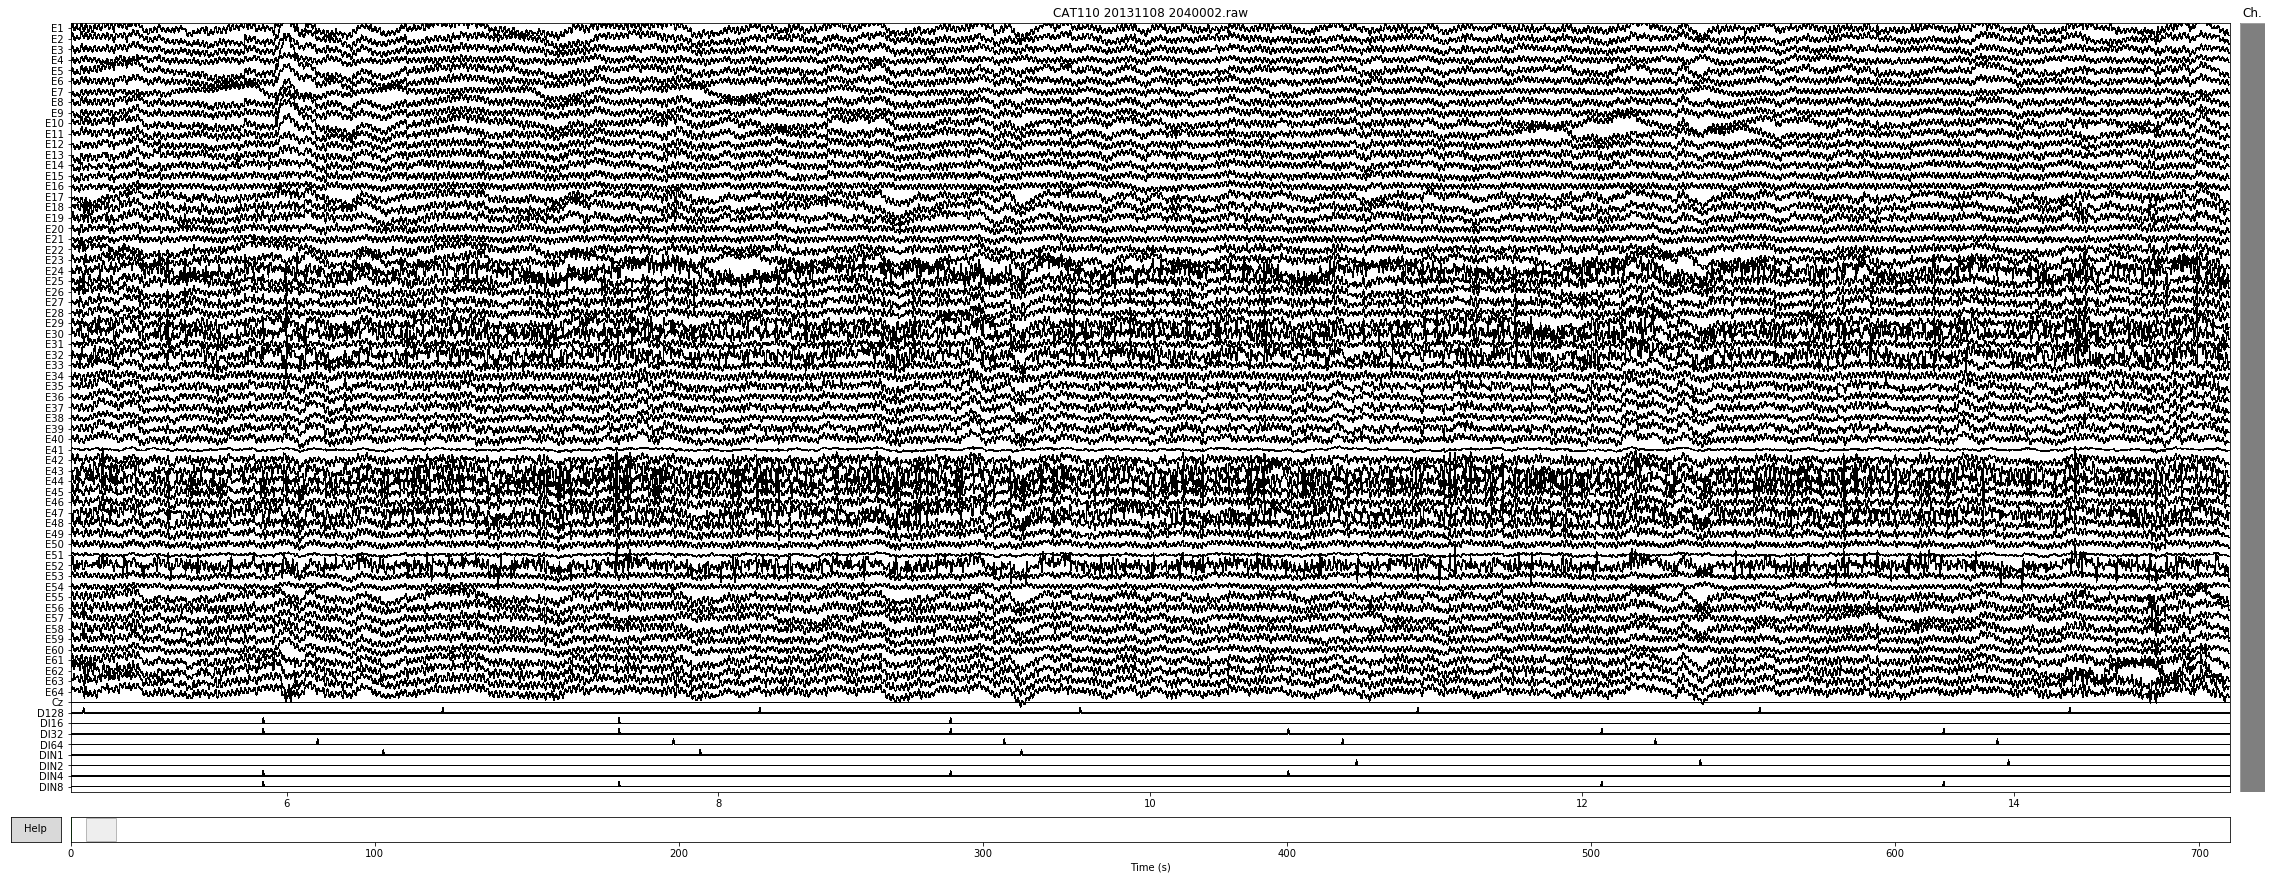

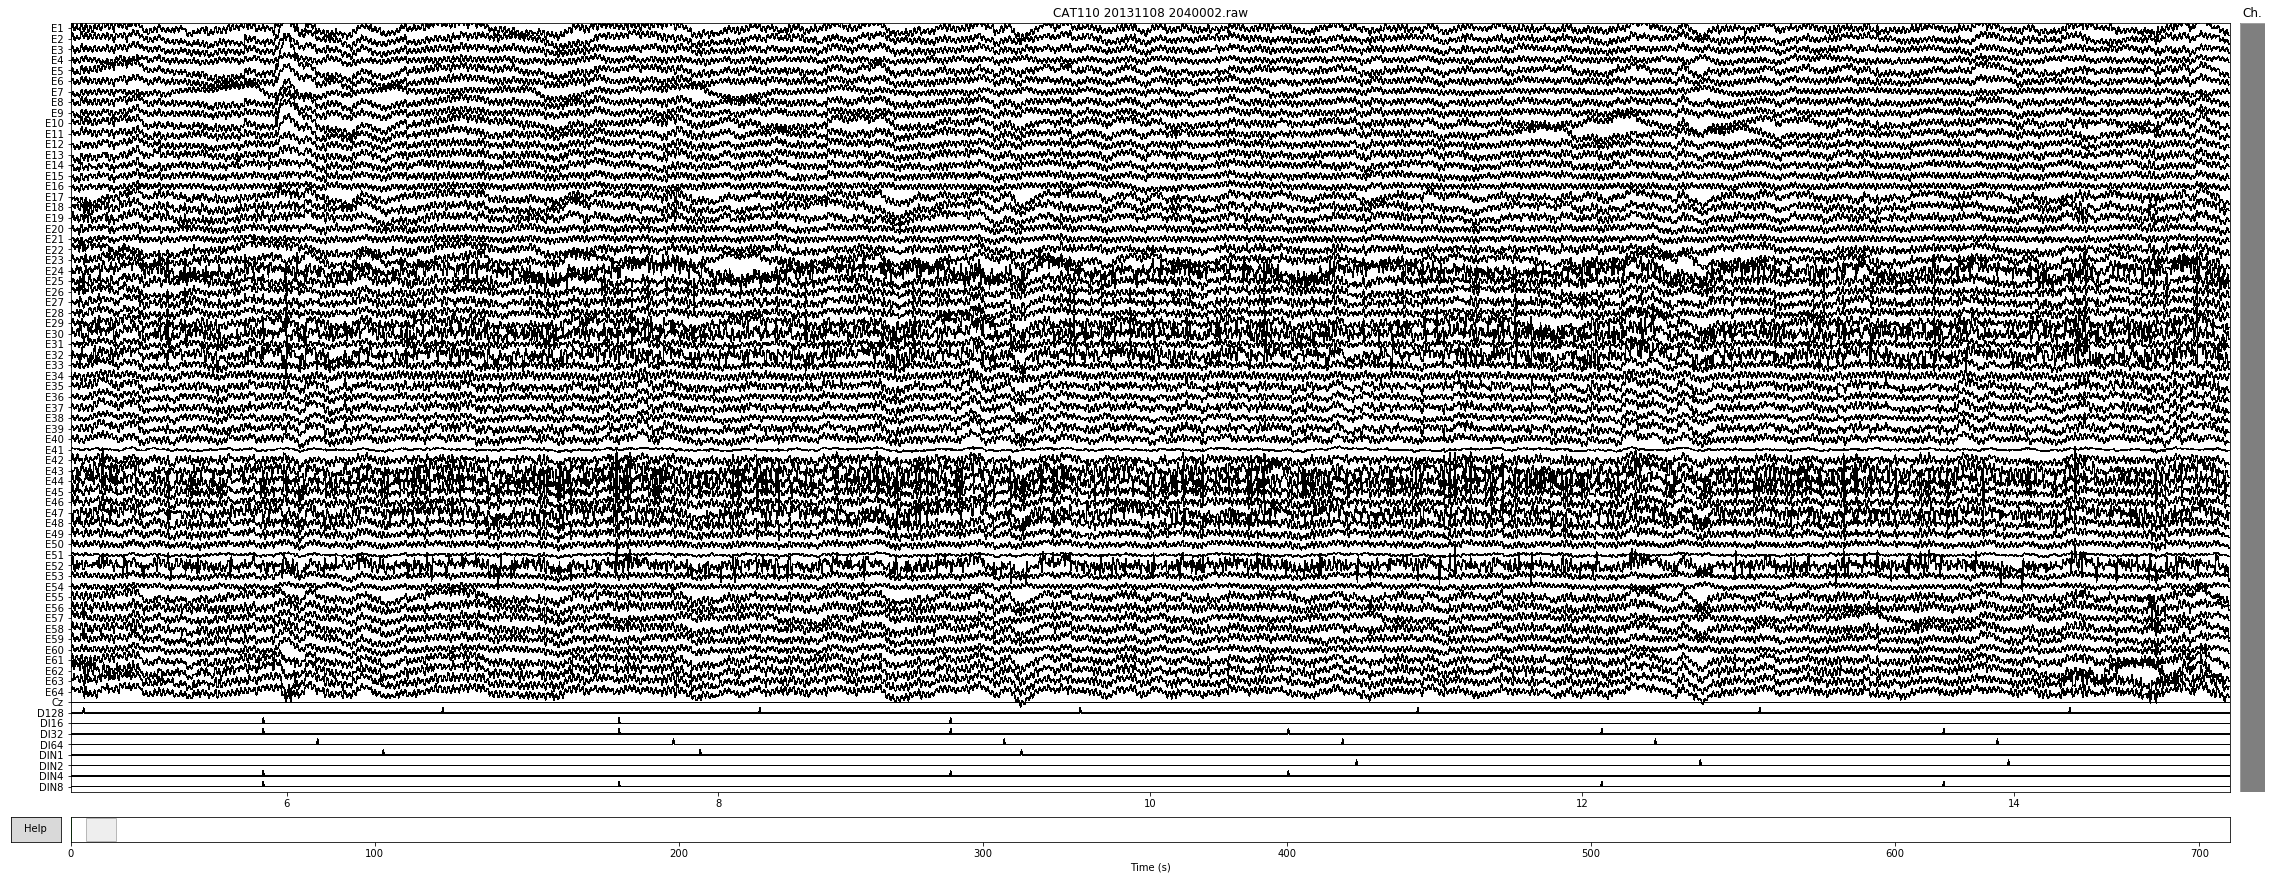

In [13]:
dane2.plot(start=5, n_channels=73)

Sukces! Czas na..

## 4. epokowanie
### 4.1 tworzenie wydarzeń

Dla przypomnienia oraz ułatwienia kolejnych etapów pracy, szybka przypominajka wartości wydarzeń w procedurze "twarze i samochody":
* 1 - osoba badana wciska strzałkę w lewo
* 2 - osoba badana wciska strzałkę w prawo
* 3 - osoba badana wciska spację
* 36 - na ekranie prezentowany jest samochód pod kątem 0 stopni
* 40 - na ekranie prezentowany jest samochód pod kątem 90 stopni
* 44 - na ekranie prezentowany jest samochód pod kątem 180 stopni (do góry "nogami")
* 52 - na ekranie prezentowana jest twarz pod kątem 0 stopni
* 56 - na ekranie prezentowana jest twarz pod kątem 90 stopni
* 60 - na ekranie prezentowana jest twarz pod kątem 180 stopni (do góry nogami)
* 128 - na erkanie pojawia się krzyżyk fiksacji I jeszcze kilka innych wydarzń, które nie są tak ważne.

Najpierw wyciagnę informację z kanałów DIN ze zmianą na konkretne, wyżej opisane wydarzenia:

In [11]:
import mypy
wydarzenia = mypy.events.get_events_from_din(dane2)

A następnie usuwam niepotrzebne już kanały DIN:

In [12]:
dane2.drop_channels(['DIN1', 'DIN2', 'DIN4', 'DIN8', 'DI16', 'DI32', 'DI64', 'D128'])

<RawEGI  |  CAT110 20131108 2040002.raw, n_channels x n_times : 65 x 177499 (710.0 sec), ~88.1 MB, data loaded>

Obecna wartość w n_channels=65, czyli z pierwotnych 73 wypadło 8 (tyle ile wyżej zdefiniowanych). So far so good!

### 4.2 tworzenie epok w oparciu o wydarzenia

Ważny moment: wybieram, które wydarzenia są dla mnie ważne. Dalej opiszę dlaczego wybrałem te konkretne, co będę ze sobą porównywał i tym podobne. Póki co poepokuję... wszystko związane z twarzami i samochodami. Będzie trochę pracy przy zaznaczniu złych epok, ale czego nie robi się w imię nauki? Epokuję po 0,5 sekundy przed i po bodźcu.

In [13]:
doepokowania = [36, 40, 44, 52, 56, 60, 128]

In [14]:
epoki = mne.Epochs(dane2, events=wydarzenia, event_id=doepokowania,
                   tmin=-0.5, tmax=0.5, preload=True)

825 matching events found
0 projection items activated
Loading data for 825 events and 251 original time points ...
0 bad epochs dropped


Super! 825! Epok! Do! Przeglądania!

### 4.3 przeglądanie złych epok i ich usuwanie

In [17]:
%matplotlib inline

In [25]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [26]:
epoki.plot(n_channels=64, n_epochs=6);

Dropped 26 epochs
Channels marked as bad: []


Przykład wyrzuconych epok:

# **WYCZYSCICCCCCCCCC!!!!!!!!!!!!**

## 5. ICA
Jakby powiedział Mikołaj na zajęciach: "czas zająć się ICA i wyczyścić dobrze te dane."
### 5.1 dopasowanie ICA

Najpierw referencja do średniej:

In [24]:
epoki.set_eeg_reference()
epoki.apply_proj()

An average reference projection was already added. The data has been left untouched.
Projections have already been applied. Setting proj attribute to True.


<ipython-input-24-729be32fcbef>:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  epoki.set_eeg_reference()


<Epochs  |  n_events : 825 (all good), tmin : -0.5 (s), tmax : 0.5 (s), baseline : (None, 0), ~102.8 MB, data loaded,
 '128': 413, '36': 69, '40': 69, '44': 68, '52': 68, '56': 69, '60': 69>

In [25]:
from mne.preprocessing import ICA
ica = ICA(method='extended-infomax', n_components=0.99)
print(ica)

<ICA  |  no decomposition, fit (extended-infomax):  samples, no dimension reduction>


In [26]:
ica.fit(epoki)

Fitting ICA to data using 65 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by explained variance: 45 components
computing Extended Infomax ICA


<ICA  |  epochs decomposition, fit (extended-infomax): 207075 samples, 45 components, channels used: "eeg">

In [28]:
%matplotlib inline

In [21]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [27]:
ica.plot_components(inst=epoki)

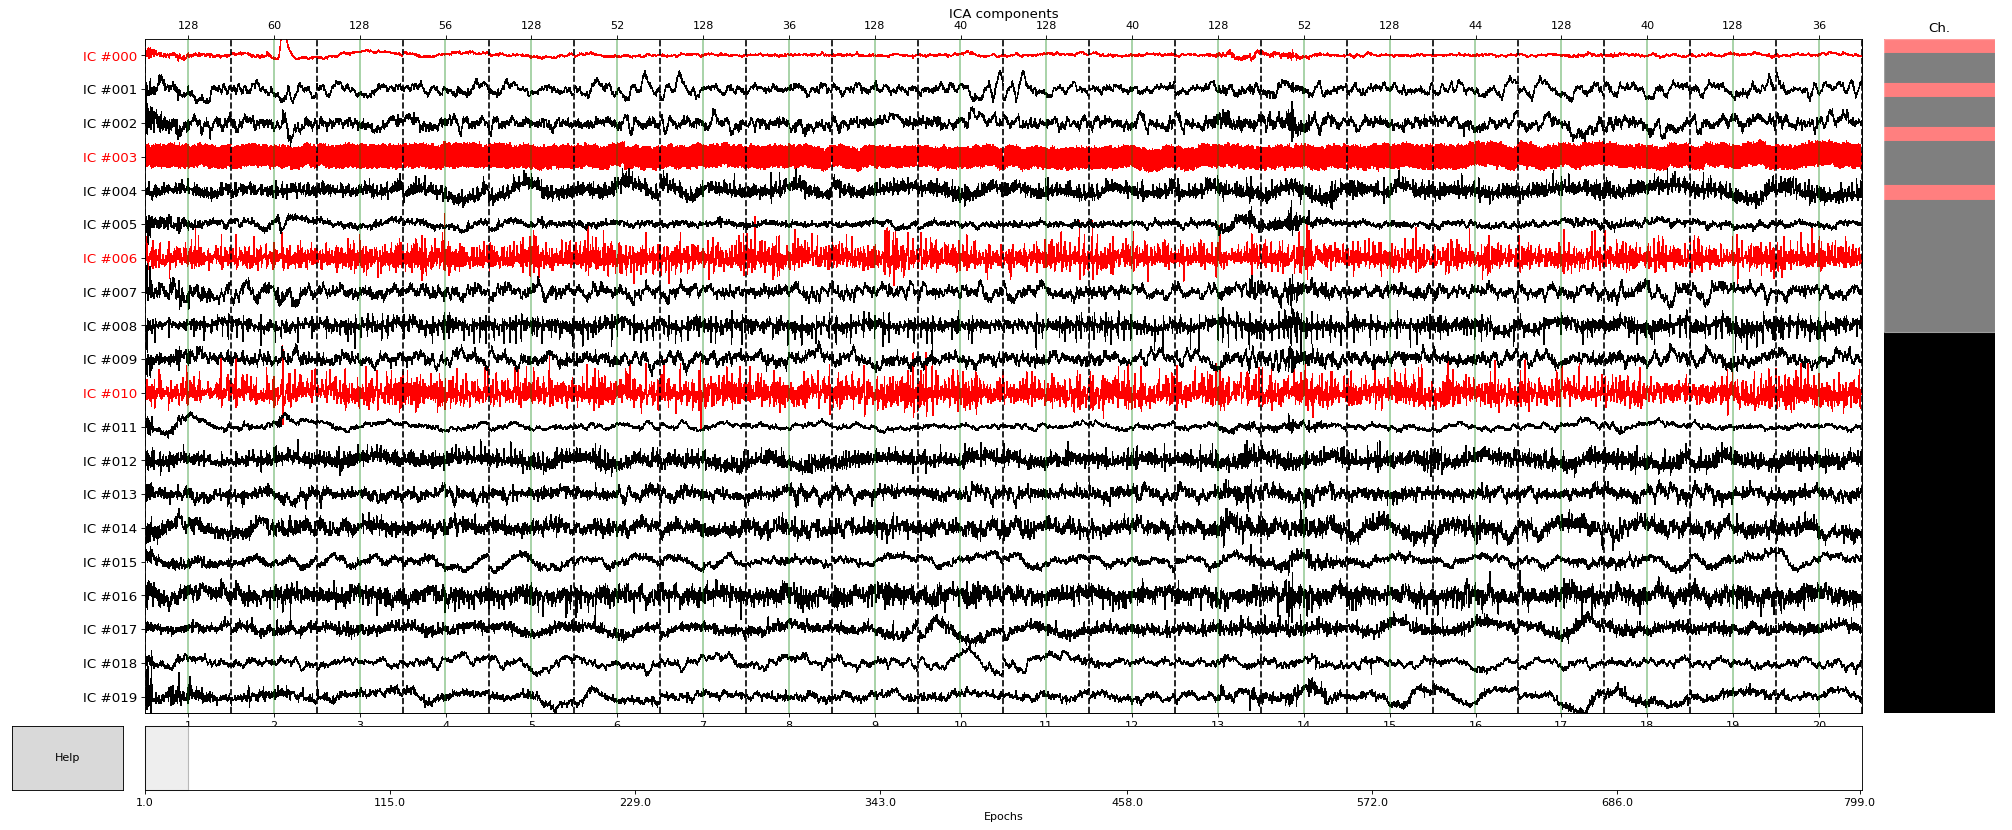

In [52]:
ica.plot_sources(epoki)

Z powyższych wykresów najbardziej nie podobają mi się następujące kompotenty:

Sprawdzam zaznaczone komponenty:

In [53]:
ica.exclude

[3, 6, 10, 0, 1, 4, 8, 11, 12, 14, 15]

I klasyczną wskazówką - pracując na kopii - usuwam komponenty:

In [30]:
epoki_czyste = ica.apply(epoki.copy())

Transforming to ICA space (45 components)
Zeroing out 0 ICA components


## 7. porównania w domenie czase - ERPy

Przypominajka - poepokowałem sobie sygnał według następujących wydarzeń:
* 36 - na ekranie prezentowany jest samochód pod kątem 0 stopni
* 40 - na ekranie prezentowany jest samochód pod kątem 90 stopni
* 44 - na ekranie prezentowany jest samochód pod kątem 180 stopni (do góry "nogami")
* 52 - na ekranie prezentowana jest twarz pod kątem 0 stopni
* 56 - na ekranie prezentowana jest twarz pod kątem 90 stopni
* 60 - na ekranie prezentowana jest twarz pod kątem 180 stopni (do góry nogami)

In [78]:
epoki_erp = epoki_czyste.copy().crop(tmin=-0.2)

### 7.1 porównanie ERP dla samochodów widocznych pod różnymi kątami:

In [79]:
erp_auto_0 = epoki_erp['36'].average()
erp_auto_90 = epoki_erp['40'].average()
erp_auto_180 = epoki_erp['44'].average()

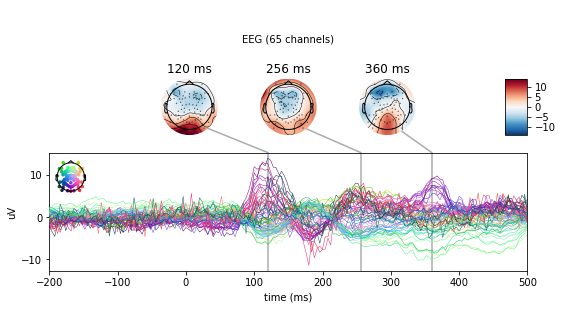

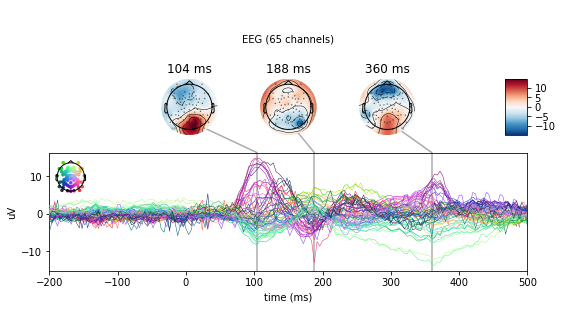

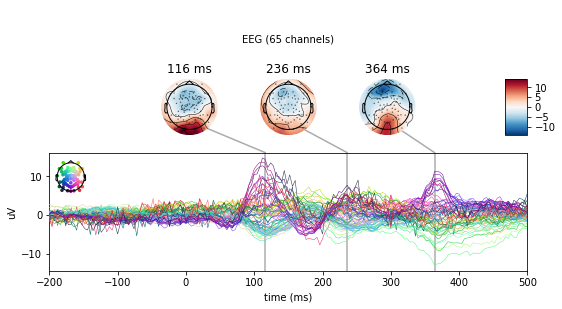

In [80]:
erp_auto_0.plot_joint();
erp_auto_90.plot_joint();
erp_auto_180.plot_joint();

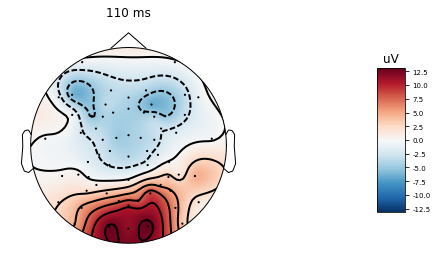

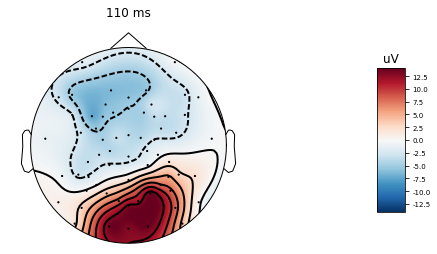

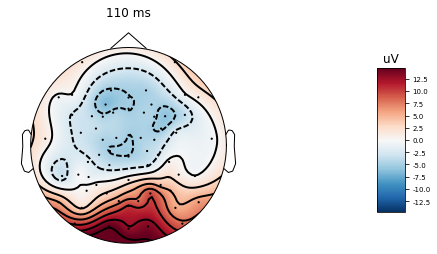

In [81]:
erp_auto_0.plot_topomap(times=[0.11], size=4., contours=12);
erp_auto_90.plot_topomap(times=[0.11], size=4., contours=12);
erp_auto_180.plot_topomap(times=[0.11], size=4., contours=12);
#nie będę tego tutaj szukał, ale najsilniejszy sygnał jest z okolic elektrody E35 oraz E39, którą znazlazłem na pozycji 34 oraz 38.

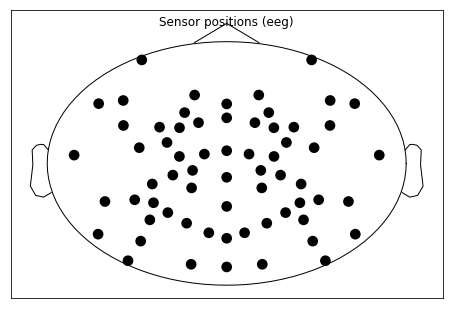

In [70]:
erp_auto_0.plot_sensors()

In [35]:
print(erp_auto_0.ch_names)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'Cz']


In [36]:
erp_auto_0.ch_names.index('E38')

37

In [72]:
%matplotlib inline

In [73]:
auta = {'auto normalnie': erp_auto_0, 'auto odwrócone o 90*': erp_auto_90, 'auto odwrócone o 180*': erp_auto_180}

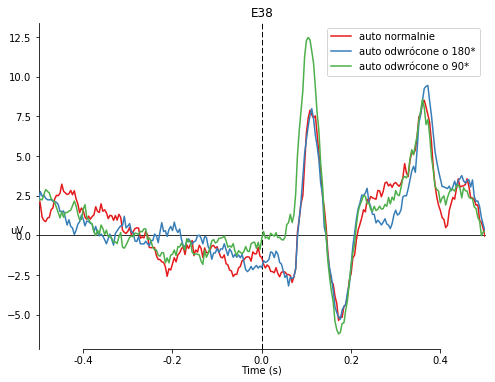

In [74]:
mne.viz.plot_compare_evokeds(auta, picks=37);

Bardzo, moim zdaniem, ciekawy wniosek: przeciętna reakcja na samochód widziany normalnie oraz odwócony o 180\* jest niemal taka sama. Znaczący wzrost w załamku P100 widzimy w przypadku auta odwróconego tylko(?) o 90\*.

### 7.1 porównanie ERP dla samochodów widocznych pod różnymi kątami:

In [82]:
erp_twarz_0 = epoki_erp['52'].average()
erp_twarz_90 = epoki_erp['56'].average()
erp_twarz_180 = epoki_erp['60'].average()

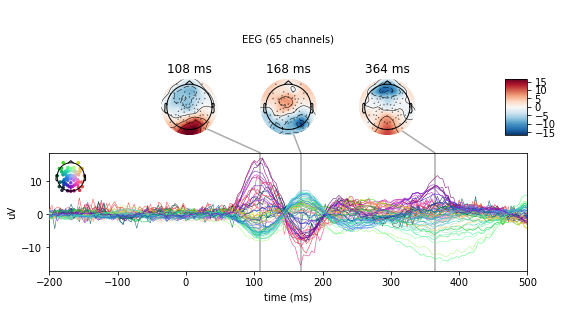

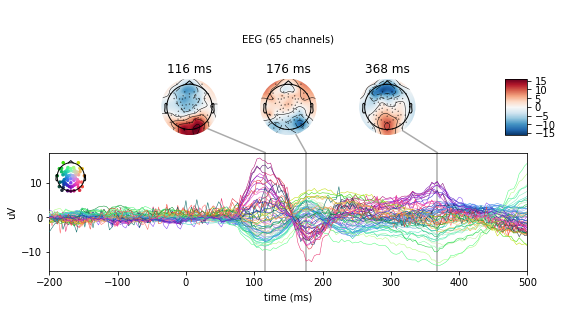

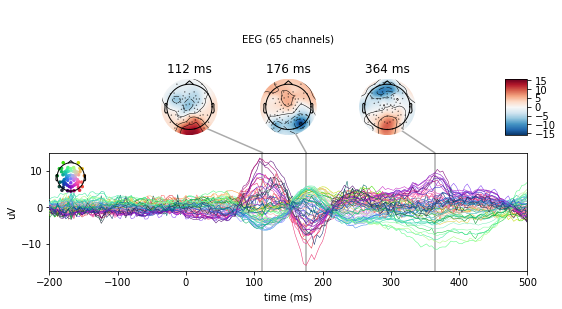

In [83]:
erp_twarz_0.plot_joint();
erp_twarz_90.plot_joint();
erp_twarz_180.plot_joint();

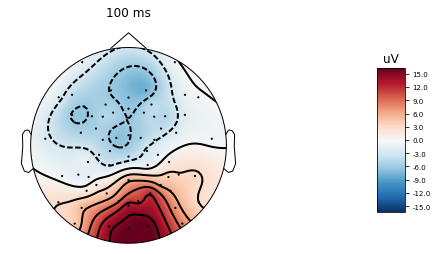

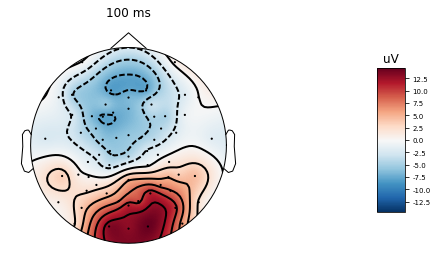

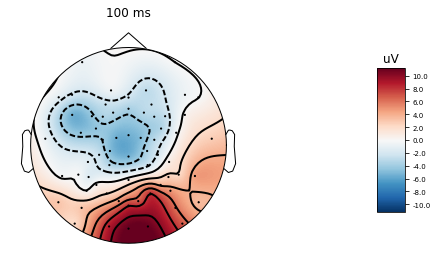

In [84]:
erp_twarz_0.plot_topomap(times=[0.1], size=4., contours=12);
erp_twarz_90.plot_topomap(times=[0.1], size=4., contours=12);
erp_twarz_180.plot_topomap(times=[0.1], size=4., contours=12);

In [46]:
%matplotlib

Using matplotlib backend: Qt5Agg


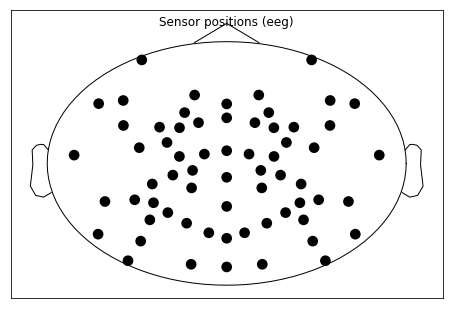

In [47]:
erp_twarz_0.plot_sensors()

Sprawdziłem, że potrzebuję E37 oraz E39, które są kolejno na pozycjach: 36 oraz 38.

In [85]:
erp_twarz_0.ch_names.index('E39')

38

In [86]:
twarze = {'twarz normalnie': erp_twarz_0, 'twarz odwrócona o 90*': erp_twarz_90, 'twarz odwrócona o 180*': erp_twarz_180}

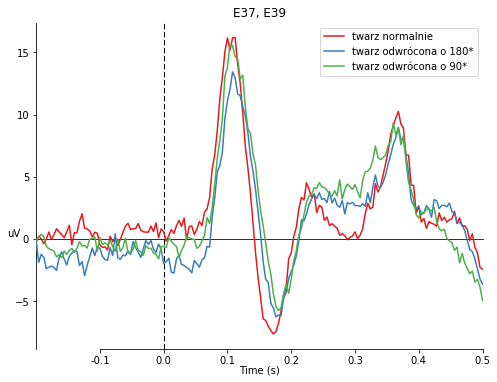

In [87]:
mne.viz.plot_compare_evokeds(twarze, picks=[36, 38]);